In [16]:
import openpyxl
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from matplotlib import pyplot as plt
import datetime
import math
import pandas as pd
from scipy import stats
import seaborn as sn

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


dataframe = pd.read_pickle('merged_dataset_elasped_time_hours_added.pkl')
dataframe = dataframe.dropna()

In [17]:
dataframe

,dt_hour,elapsed_time_hours,e_series_pm,ambient_Temp_C_Mean,rh_pct_Mean,BarometricPressure_mbar_Mean,wind_x,wind_y,season_Autumn,season_Spring,season_Summer,season_Winter,reference_pm
0,2015-11-07 1:00,0.0,0.679598,-1.928276,34.400690,922.000000,19.697890,7.279639,0,0,0,1,1.0
1,2015-11-07 2:00,1.0,0.501925,-2.192000,34.325000,922.000000,17.821900,6.586340,0,0,0,1,0.0
2,2015-11-07 3:00,2.0,0.559391,-1.828172,34.601724,922.000000,24.387864,9.012886,0,0,0,1,0.0
3,2015-11-07 4:00,3.0,0.564632,-1.751328,34.668276,922.344828,24.387864,9.012886,0,0,0,1,0.0
4,2015-11-07 5:00,4.0,0.607770,-2.136534,34.612069,922.396552,22.511874,8.319587,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2017-04-26 3:00,12866.0,1.886483,-3.908121,34.497241,925.000000,-0.851073,2.876747,0,1,0,0,0.0
12390,2017-04-26 4:00,12867.0,2.793138,-4.397569,34.655172,924.120690,-4.189220,-5.608068,0,1,0,0,0.0
12391,2017-04-26 5:00,12868.0,3.117776,-4.896259,34.524483,924.000000,0.464148,6.984595,0,1,0,0,2.0
12392,2017-04-26 6:00,12869.0,3.179569,-5.146069,34.432414,924.000000,-7.805035,1.755402,0,1,0,0,4.0


In [28]:
# Convert to numpy array
# Seperate the target 
# Remove the target from the DATA matrix
DATA = dataframe.to_numpy()
target = DATA[:,12].reshape(-1,1)
DATA = np.delete(DATA, 12, 1)
DATA = np.delete(DATA, 0, 1)
hours = DATA[:,0]
DATA = np.delete(DATA, 0, 1)

In [30]:
DATA[0,:]

array([0.6795977009999999, -1.9282758619999998, 34.40068966, 922.0,
       19.69788979, 7.279638565, 0, 0, 0, 1], dtype=object)

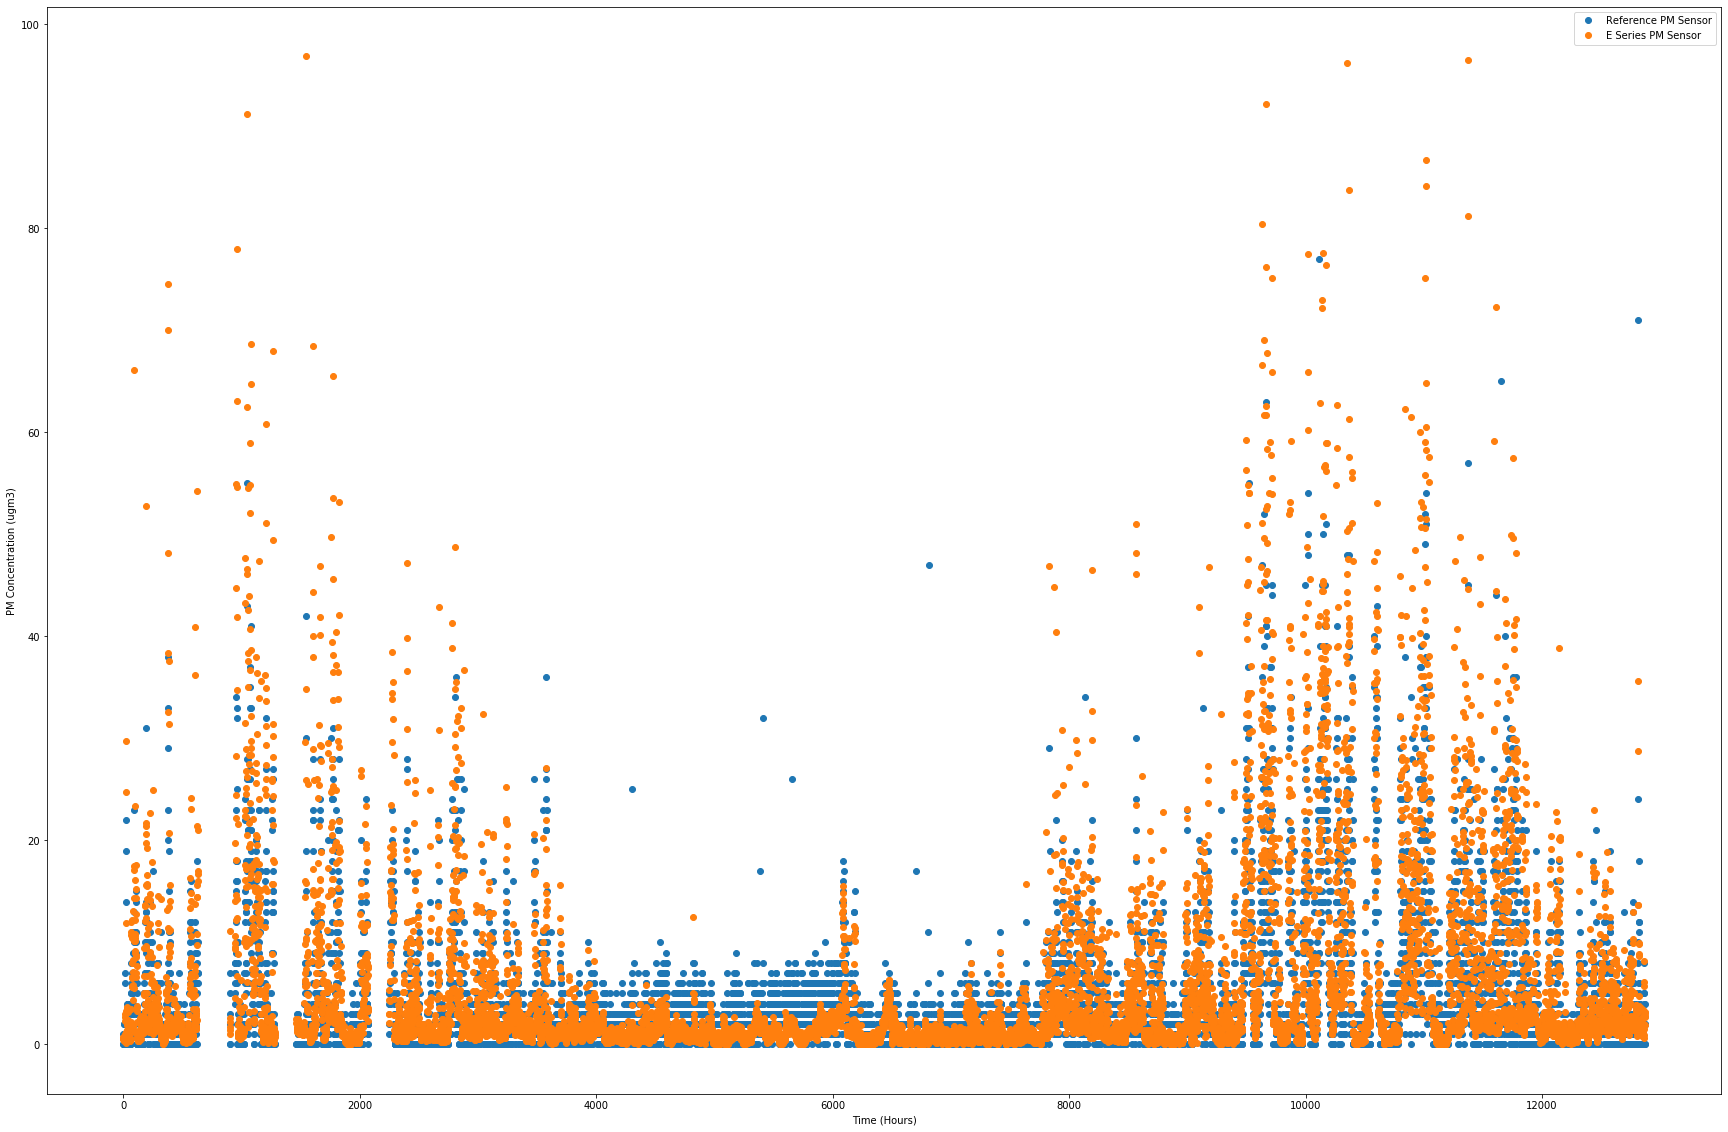

In [33]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o',label="Reference PM Sensor")
plt.plot(hours, DATA[:,0], 'o',label="E Series PM Sensor")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc="best")

In [186]:
DATA_train, DATA_test, target_train, target_test = train_test_split(DATA, target, random_state=0)

In [202]:
# Simple Linear Regression method
SLR = LinearRegression().fit(DATA_train, target_train)
print("Training set score: {:0.6f}".format(SLR.score(DATA_train, target_train)))
print("Test set score: {:0.6f}".format(SLR.score(DATA_test, target_test)))

print('MAE: {:0.4f}'.format(metrics.mean_absolute_error(target, SLR.predict(DATA))))
print('R2: {:0.4f}'.format(metrics.r2_score(target, SLR.predict(DATA))))
print('Estimator feature strengths: {}'.format(SLR.coef_))

Training set score: 0.818267
Test set score: 0.859328
MAE: 1.6728
R2: 0.8294
Estimator feature strengths: [[ 0.60740232 -0.00134037  0.00788087  0.00938803 -0.00083931  0.00206931
  -0.0694839  -0.16155496  0.78349874 -0.55245988]]


In [163]:
DATA[:,0]

array([0.6795977009999999, 0.501925287, 0.559390805, ..., 3.117775862,
       3.179568966, 2.679603448], dtype=object)

In [166]:
target.reshape(1,-1)

array([[1.0, 0.0, 0.0, ..., 2.0, 4.0, 2.0]], dtype=object)

In [183]:
SLR.predict(DATA).reshape(1,-1).flatten()

array([0.86221374, 0.75419198, 0.79030023, ..., 2.7733361 , 2.80659822,
       2.4800718 ])

In [185]:
data = {'E Series Sensor Data':DATA[:,0], 'Linear Regression Prediction':SLR.predict(DATA).flatten(), 'Reference pm Measurement':target.reshape(1,-1).flatten()}
df = pd.DataFrame(data)
df.to_csv('Linear Regression Model.csv')

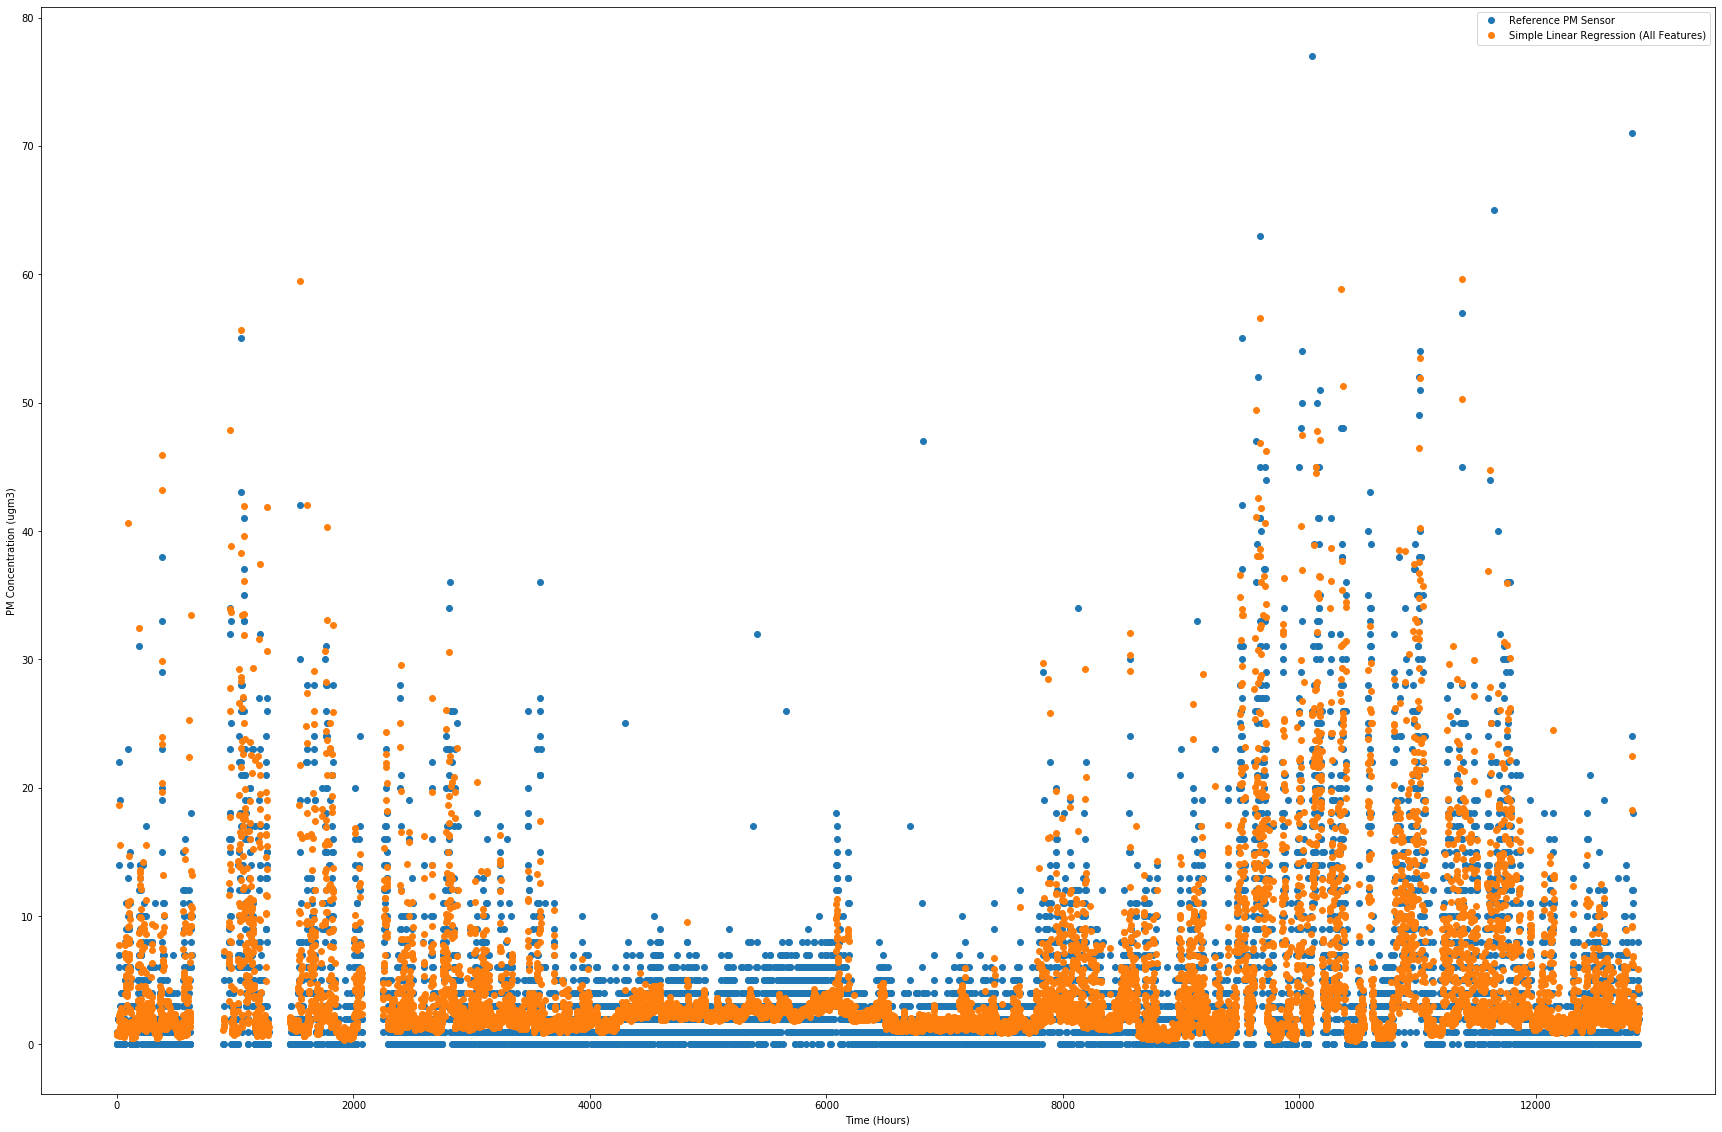

In [188]:
plt.figure(figsize=(30,20))
plt.plot(hours, target, 'o',label="Reference PM Sensor")
plt.plot(hours, SLR.predict(DATA), 'o',label="Simple Linear Regression (All Features)")
plt.xlabel('Time (Hours)')
plt.ylabel('PM Concentration (ugm3)')
plt.legend(loc='best')

In [199]:
linear_regression = LinearRegression(n_jobs=10).fit(SLR.predict(DATA), target)

In [200]:
linear_regression.coef_, linear_regression.intercept_

(array([[0.99823056]]), array([-0.00353915]))

Text(0, 0.5, 'Reference Concentration (ugm3)')

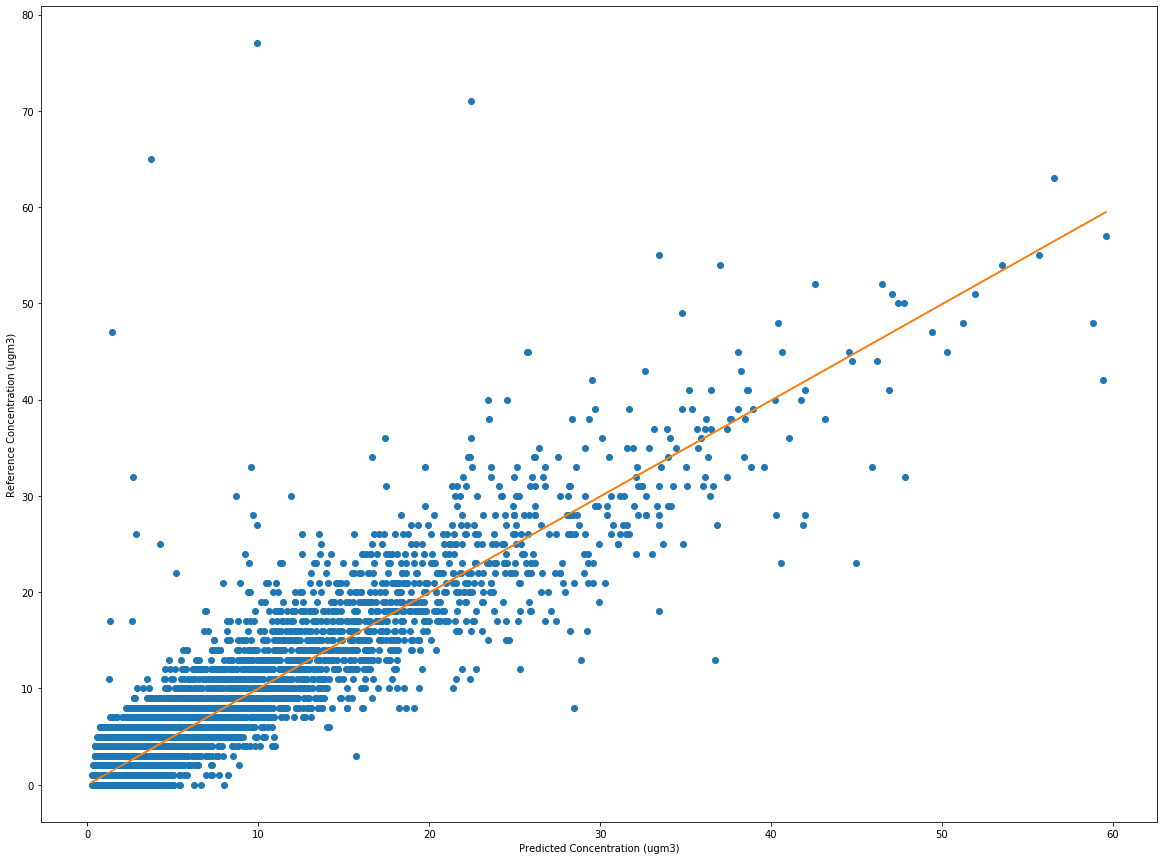

In [193]:
plt.figure(figsize=(20,15))
plt.plot(SLR.predict(DATA), target, 'o')
plt.plot(SLR.predict(DATA), linear_regression.coef_ * SLR.predict(DATA) + linear_regression.intercept_)
plt.xlabel('Predicted Concentration (ugm3)')
plt.ylabel('Reference Concentration (ugm3)')

In [203]:
R2 = metrics.r2_score(target, linear_regression.predict(SLR.predict(DATA)))

In [204]:
R2

0.8293710755712516

In [211]:
np.size(DATA[:,0],0)

11999

In [212]:
np.size(DATA[:0],1)

10

In [213]:
1 - ((1-R2**2)*(np.size(DATA[:,0],0)-1))/(np.size(DATA[:,0],0) - np.size(DATA[:0],1) - 1)

0.6875960009316473

Text(0, 0.5, 'Reference Concentration (ugm3)')

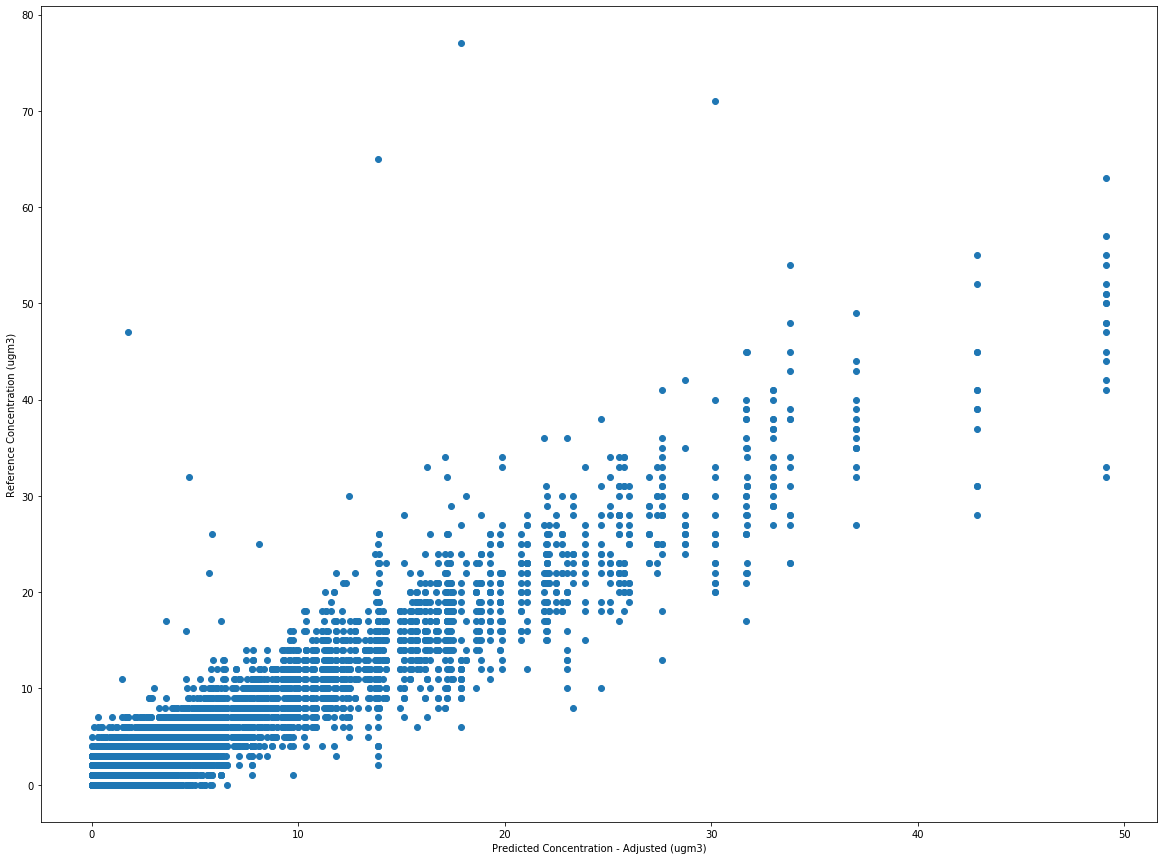

In [65]:
# Decision tree regression method
tree_regressor = DecisionTreeRegressor(max_depth=None, min_samples_leaf=8).fit(DATA_train, target_train)
plt.figure(figsize=(20,15))
plt.plot(tree_regressor.predict(DATA), target, 'o')
plt.xlabel('Predicted Concentration - Adjusted (ugm3)')
plt.ylabel('Reference Concentration (ugm3)')

In [137]:
linear_regression = LinearRegression().fit(target, tree_regressor.predict(DATA).reshape(-1,1))

In [138]:
linear_regression.coef_, linear_regression.intercept_

(array([[0.88309644]]), array([0.52048859]))

Text(0, 0.5, 'Reference Concentration (ugm3)')

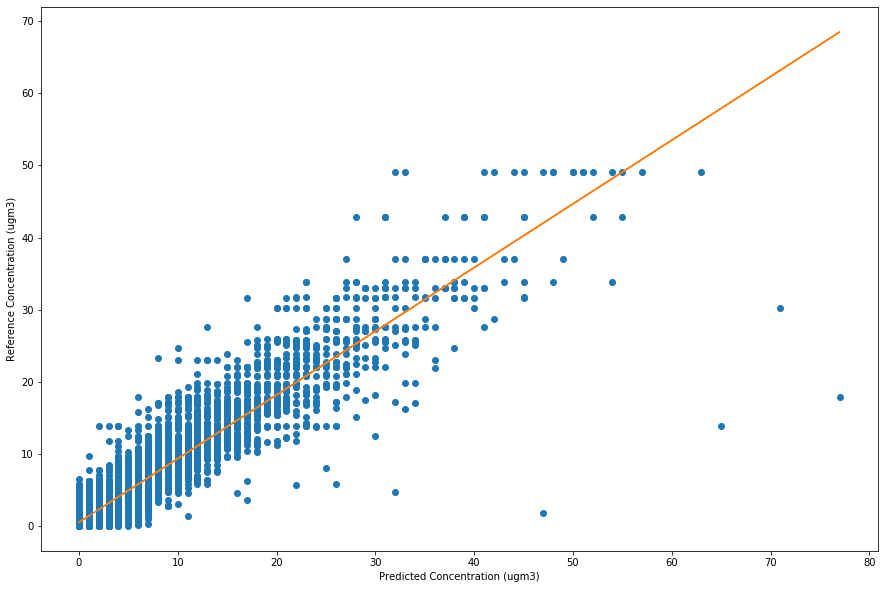

In [150]:
plt.figure(figsize=(15,10))
plt.plot(target, tree_regressor.predict(DATA).reshape(-1,1), 'o')
plt.plot(target, linear_regression.predict(target))
plt.xlabel('Target (ugm3)')
plt.ylabel('Reference Concentration (ugm3)')

In [149]:
metrics.mean_squared_error(target, tree_regressor.predict(DATA), squared=False)

2.298964400025968

In [157]:
metrics.r2_score(target, tree_regressor.predict(DATA))

0.86754946804468

In [155]:
metrics.mean_absolute_error(target, tree_regressor.predict(DATA))

1.3873071641343997